# Time series with change point

In [26]:
import numpy as np
from changepoint.mean_shift_model import MeanShiftModel 
ts = np.concatenate([np.random.normal(0, 0.1, 10), np.random.normal(1, 0.1, 10)]) 
model = MeanShiftModel() 
stats_ts, pvals, nums = model.detect_mean_shift(ts, B=10000)

In [27]:
%matplotlib inline

In [28]:
import pylab as pl

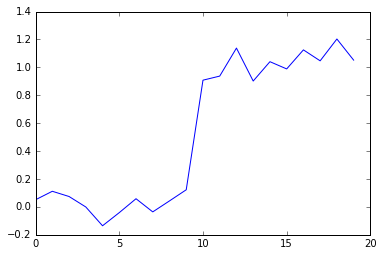

In [29]:
pl.plot(ts)

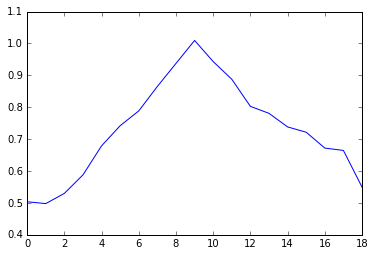

In [30]:
pl.plot(stats_ts)

In [31]:
pvals

[0.30159999999999998,
 0.2016,
 0.1023,
 0.040099999999999997,
 0.0082000000000000007,
 0.002,
 0.0011000000000000001,
 0.0001,
 0.0,
 0.0,
 0.0,
 0.0001,
 0.00050000000000000001,
 0.00029999999999999997,
 0.00080000000000000004,
 0.002,
 0.0115,
 0.019699999999999999,
 0.1875]

In [37]:
np.argmin(pvals)

8

In [43]:
np.where(np.array(stats_ts)>1.0)

(array([9]),)

One strategy to choose a change point is to pick a point which has a low pvalue and also has a large enough effect size. Note that a changepoint depends on 2 things (a) Effect size and (b) Significance (pvalue). It is possible for very small effect sizes to also be significant. That is why we need to use both criterion to ultimately get a estimate. Here I used the threshold for effect size as 1.0 (this depends on your data) and the significance level of 0.05  

# Time series with no change point

In [44]:
import numpy as np
from changepoint.mean_shift_model import MeanShiftModel 
ts = np.concatenate([np.random.normal(0, 0.1, 10), np.random.normal(0, 0.1, 10)]) 
model = MeanShiftModel() 
stats_ts, pvals, nums = model.detect_mean_shift(ts, B=10000)

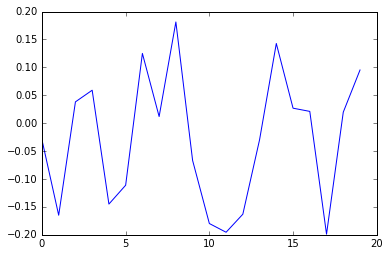

In [45]:
pl.plot(ts)

In [46]:
pvals

[0.45469999999999999,
 0.186,
 0.36070000000000002,
 0.52629999999999999,
 0.33289999999999997,
 0.22700000000000001,
 0.44550000000000001,
 0.50880000000000003,
 0.79430000000000001,
 0.74850000000000005,
 0.53620000000000001,
 0.29959999999999998,
 0.14630000000000001,
 0.13150000000000001,
 0.3256,
 0.40300000000000002,
 0.49309999999999998,
 0.1583,
 0.19889999999999999]

In [47]:
np.where(np.array(pvals)<0.05)

(array([], dtype=int64),)

In [48]:
np.where(np.array(stats_ts)>1.0)

(array([], dtype=int64),)

Here note that no point is significant as pvals are all > 0.05

Please cite the below if you use this package: 
    
@inproceedings{Kulkarni:langchange,
 author = {Kulkarni,Vivek and Al-Rfou, Rami and Perozzi,Bryan and Skiena, Steven},
 title = {Statistically Significant Detection of Linguistic Change},
 booktitle = {Proceedings of the 24th International World Wide Web Conference},
 series = {WWW '15},
 year = {2015},
 location = {Florence, Italy},
 numpages = {11},
} 

Other references: http://viveksck.github.io/langchangetrack/ and http://www.variation.com/cpa/tech/changepoint.html